In [2]:
#pip install openpyxl
import pandas as pd 
pd.set_option('display.max_rows', 100)

Step1. Created unstructured format to structured format to csv file

In [3]:
import json

#Hyderabad Cars

In [4]:

import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = r'C:\Users\moham\vs code\guvi\project-3\hyderabad_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='hyderabad_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age

    })

# Apply the extraction function to each row
hyderabad_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(hyderabad_df.head())

# Save the structured data to a new Excel file (optional)
hyderabad_df.to_csv('hyderabad_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year        Car_Model  \
0    Petrol  Hatchback            20,000              2022  Volkswagen Polo   
1    Petrol  Hatchback            85,582          Oct 2014      Hyundai EON   
2    Petrol        SUV            10,000              2023    Hyundai Venue   
3    Petrol  Hatchback            50,750          Mar 2017    Maruti Baleno   
4    Petrol        SUV            10,000              2022    Mahindra Thar   

      Ownership                                           Features  \
0   First Owner  Power Steering, Power Windows Front, Air Condi...   
1  Second Owner  Power Steering, Power Windows Front, Air Condi...   
2   First Owner  Power Steering, Power Windows Front, Air Condi...   
3   First Owner  Power Steering, Power Windows Front, Air Condi...   
4   First Owner  Power Steering, Power Windows Front, Air Condi...   

  Engine_Power     Mileage                                           Car_Link  \
0    108.62bhp  16.47 k

In [ ]:
hyderabad_df

Bangalore cars

In [5]:
#Bangalore cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = r'C:\Users\moham\vs code\guvi\project-3\bangalore_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='bangalore_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
        })

# Apply the extraction function to each row
bangalore_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(bangalore_df.head())

# Save the structured data to a new Excel file (optional)
bangalore_df.to_csv('bangalore_cars.csv', index=False)


  Fuel_Type  Body_Type Kilometers_Driven Registration_Year  \
0    Petrol  Hatchback          1,20,000              2015   
1    Petrol        SUV            32,706          Feb 2018   
2    Petrol  Hatchback            11,949         Sept 2018   
3    Petrol      Sedan            17,794          Dec 2014   
4    Diesel        SUV            60,000              2015   

            Car_Model     Ownership  \
0      Maruti Celerio   Third Owner   
1       Ford Ecosport  Second Owner   
2          Tata Tiago   First Owner   
3       Hyundai Xcent   First Owner   
4  Maruti SX4 S Cross   First Owner   

                                            Features Engine_Power     Mileage  \
0  Power Steering, Power Windows Front, Air Condi...     67.04bhp   23.1 kmpl   
1  Power Steering, Power Windows Front, Air Condi...    121.31bhp     17 kmpl   
2  Power Steering, Power Windows Front, Air Condi...        84bhp  23.84 kmpl   
3  Power Steering, Power Windows Front, Air Condi...     81.86bhp   

In [ ]:
bangalore_df

Chennai cars 

In [ ]:
#Bangalore cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = r'C:\Users\moham\vs code\guvi\project-3\chennai_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='chennai_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
        })

# Apply the extraction function to each row
chennai_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(chennai_df.head())

# Save the structured data to a new Excel file (optional)
chennai_df.to_csv('chennai_cars.csv', index=False)


In [ ]:
chennai_df 

Delhi cars

In [ ]:
#delhi_cars
import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = r'C:\Users\moham\vs code\guvi\project-3\delhi_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='delhi_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
delhi_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(delhi_df.head())

# Save the structured data to a new Excel file (optional)
delhi_df.to_csv('delhi_cars.csv', index=False)


In [ ]:
delhi_df

Jaipure cars

In [ ]:

import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = r'C:\Users\moham\vs code\guvi\project-3\jaipur_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='jaipur_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
jaipur_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(jaipur_df.head())

# Save the structured data to a new Excel file (optional)
jaipur_df.to_csv('jaipur_cars.csv', index=False)


#kolkata_cars

In [ ]:

import pandas as pd
import ast

# Load the dataset with the correct engine
file_path = 'kolkata_cars.xlsx'
data = pd.read_excel(file_path, sheet_name='kolkata_cars.csv', engine='openpyxl')

# Convert string representations of dictionaries into actual dictionaries
data['new_car_detail'] = data['new_car_detail'].apply(ast.literal_eval)
data['new_car_overview'] = data['new_car_overview'].apply(ast.literal_eval)
data['new_car_feature'] = data['new_car_feature'].apply(ast.literal_eval)
data['new_car_specs'] = data['new_car_specs'].apply(ast.literal_eval)

# Function to extract data from nested dictionaries
def extract_details(row):
    details = row.get('new_car_detail', {})
    overview = row.get('new_car_overview', {})
    features = row.get('new_car_feature', {})
    specs = row.get('new_car_specs', {})
    
    # Extracting fields from details
    fuel_type = details.get('ft')
    body_type = details.get('bt')
    kilometers = details.get('km')
    price = details.get('price')
    car_model = details.get('model')
    car_age = details.get('modelYear')
    
    
    # Extracting fields from overview (like registration year, model, etc.)
    overview_dict = {item['key']: item['value'] for item in overview.get('top', [])}
    
    # Extracting features (listing them as comma-separated values)
    feature_list = [feature['value'] for feature in features.get('top', [])]
    feature_str = ', '.join(feature_list)
    
    # Extracting specifications (like engine power, mileage, etc.)
    specs_dict = {item['key']: item['value'] for item in specs.get('top', [])}
    
    # Return a flattened structure
    return pd.Series({
        'Fuel_Type': fuel_type,
        'Body_Type': body_type,
        'Kilometers_Driven': kilometers,
        'Registration_Year': overview_dict.get('Registration Year'),
        'Car_Model': car_model,
        'Ownership': overview_dict.get('Ownership'),
        'Features': feature_str,
        'Engine_Power': specs_dict.get('Max Power'),
        'Mileage': specs_dict.get('Mileage'),
        'Car_Link': row.get('car_links'),
        'Price': price,
        'Car_Age': car_age
    })

# Apply the extraction function to each row
kolkata_df = data.apply(extract_details, axis=1)

# Display the structured dataset
print(kolkata_df.head())

# Save the structured data to a new Excel file (optional)
kolkata_df.to_csv('kolkata_cars.csv', index=False)


#Add a city column

In [37]:

import pandas as pd

# Load the dataset
kolkata_df = pd.read_csv('kolkata_cars.csv')
bangalore_df = pd.read_csv('bangalore_cars.csv')
chennai_df = pd.read_csv('chennai_cars.csv')
delhi_df = pd.read_csv('delhi_cars.csv')
hyderabad_df = pd.read_csv('hyderabad_cars.csv')
jaipur_df=pd.read_csv('jaipur_cars.csv')
# Add a new column 'City' and assign the value to all rows
kolkata_df['City'] = 'Kolkata'
bangalore_df['City'] = 'Bangalore'
chennai_df['City'] = 'Chennai'
delhi_df['City'] = 'Delhi'
hyderabad_df['City'] = 'Hyderabad'
jaipur_df['City'] = 'Jaipur'

# Concatenate all datasets into a single dataset
combined_df = pd.concat([kolkata_df,bangalore_df,chennai_df,delhi_df,hyderabad_df])

# Save the combined dataset to a new CSV file
combined_df.to_csv('combined_cars.csv', index=False)


In [39]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7249 entries, 0 to 1482
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fuel_Type          7249 non-null   object
 1   Body_Type          7245 non-null   object
 2   Kilometers_Driven  7249 non-null   object
 3   Registration_Year  7204 non-null   object
 4   Car_Model          7249 non-null   object
 5   Ownership          7218 non-null   object
 6   Features           7191 non-null   object
 7   Engine_Power       7198 non-null   object
 8   Mileage            6990 non-null   object
 9   Car_Link           7249 non-null   object
 10  Price              7249 non-null   object
 11  Car_Age            7249 non-null   int64 
 12  City               7249 non-null   object
dtypes: int64(1), object(12)
memory usage: 792.9+ KB


Handling Missing Values,Standardising Data Formats,Encoding Categorical Variables,Normalizing Numerical Features and Removing outliners

In [49]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('combined_cars.csv')


C:\Users\moham\AppData\Local\Temp\ipykernel_12088\869387850.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[column].fillna(combined_df[column].mode()[0], inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_12088\869387850.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [50]:
import pandas as pd
import numpy as np
import re

def standardize_data_formats(df):
    # Handle 'Kilometers Driven'
    if 'Kilometers_Driven' in df.columns:
        df['Kilometers_Driven'] = df['Kilometers_Driven'].str.replace(' km', '').str.replace(',', '').astype(float)
    
    # Handle 'Engine Power'
    if 'Engine_Power' in df.columns:
        df['Engine_Power'] = df['Engine_Power'].str.extract('(\d+)').astype(float)
    
    # Handle 'Mileage'
    if 'Mileage' in df.columns:
        df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+)').astype(float)
    
    # Handle 'Price'
    if 'Price' in df.columns:
        def convert_price(price_str):
            price_str = price_str.strip()
            if 'Lakh' in price_str:
                return float(price_str.replace('₹', '').replace(' Lakh', '').replace(',', '').strip()) * 100000
            elif 'Crore' in price_str:
                return float(price_str.replace('₹', '').replace(' Crore', '').replace(',', '').strip()) * 10000000
            else:
                return float(price_str.replace('₹', '').replace(',', '').strip())
        
        df['Price'] = df['Price'].apply(convert_price)
    
    # Handle 'Car Age'
    if 'Registration_Year' in df.columns:
        # Ensure 'Registration_Year' is numeric
        df['Registration_Year'] = pd.to_numeric(df['Registration_Year'], errors='coerce')
        df['Car_Age'] = 2024 - df['Registration_Year']
    
    return df

# Load the combined dataset
combined_df1= pd.read_csv('combined_df1.csv')

# Apply the standardization function
combined_df1 = standardize_data_formats(combined_df1)

# Save the cleaned dataset to a new CSV file
combined_df1.to_csv('cleaned_combined_cars.csv', index=False)
print("Data preprocessing completed and saved to 'cleaned_combined_cars.csv'")


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\moham\AppData\Local\Temp\ipykernel_12088\3154110257.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Engine_Power'] = df['Engine_Power'].str.extract('(\d+)').astype(float)
C:\Users\moham\AppData\Local\Temp\ipykernel_12088\3154110257.py:16: SyntaxWarning: invalid escape sequence '\d'
  df['Mileage'] = df['Mileage'].str.extract('(\d+\.\d+)').astype(float)


Data preprocessing completed and saved to 'cleaned_combined_cars.csv'


In [90]:
combined_df1.to_csv("cleaned_combined_cars.csv")

In [1]:
import pandas as pd

# Sample DataFrame
combined_df = pd.read_csv('cleaned_combined_cars.csv')  # Load your dataset

# Function to fill NaN values
def fill_nans(column):
    if column.dtype == 'object':  # Categorical column
        return column.fillna(column.mode()[0])  # Fill with mode
    else:  # Continuous column
        return column.fillna(column.mean())  # Fill with mean

# Apply the function to each column
combined_df = combined_df.apply(fill_nans)

# Check for remaining NaN values
remaining_nans = combined_df.isna().sum()
print("Remaining NaN values in each column:\n", remaining_nans)

# Display the updated DataFrame
print(combined_df)


Remaining NaN values in each column:
 Fuel_Type            0
Body_Type            0
Kilometers_Driven    0
Registration_Year    0
Car_Model            0
Engine_Power         0
Mileage              0
City                 0
Ownership_Encoded    0
Star_Rating          0
Price                0
dtype: int64
     Fuel_Type  Body_Type  Kilometers_Driven  Registration_Year  \
0       Petrol      Sedan            70000.0        2014.000000   
1       Petrol  Hatchback            23981.0        2015.715738   
2       Petrol        SUV             7100.0        2015.715738   
3       Petrol  Hatchback            71574.0        2015.715738   
4       Diesel        SUV            50000.0        2014.000000   
...        ...        ...                ...                ...   
7244    Diesel        SUV            60000.0        2013.000000   
7245    Diesel      Sedan            50000.0        2014.000000   
7246    Diesel      Sedan           120000.0        2018.000000   
7247    Diesel        SUV 

In [93]:
df=pd.read_csv("cleaned_combined_cars.csv")


In [94]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,Car_Age,City
0,0,0,0,Petrol,Sedan,70000.0,2014.000000,Toyota Camry,Third Owner,"Power Steering, Power Windows Front, Air Condi...",158.0,19.1600,https://www.cardekho.com/used-car-details/used...,975000.0,10.000000,Kolkata
1,1,1,1,Petrol,Hatchback,23981.0,2015.715738,Datsun RediGO,First Owner,"Power Steering, Power Windows Front, Air Condi...",53.0,22.7000,https://www.cardekho.com/buy-used-car-details/...,266000.0,8.284262,Kolkata
2,2,2,2,Petrol,SUV,7100.0,2015.715738,Renault Kiger,First Owner,"Power Steering, Power Windows Front, Air Condi...",71.0,19.0300,https://www.cardekho.com/used-car-details/used...,595000.0,8.284262,Kolkata
3,3,3,3,Petrol,Hatchback,71574.0,2015.715738,Hyundai i20,Second Owner,"Power Steering, Power Windows Front, Air Condi...",80.0,19.2554,https://www.cardekho.com/buy-used-car-details/...,223000.0,8.284262,Kolkata
4,4,4,4,Diesel,SUV,50000.0,2014.000000,Audi Q3,Second Owner,"Power Steering, Power Windows Front, Air Condi...",174.0,15.7300,https://www.cardekho.com/used-car-details/used...,1200000.0,10.000000,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,7244,7244,7244,Diesel,SUV,60000.0,2013.000000,Mahindra XUV500,First Owner,"Power Steering, Power Windows Front, Air Condi...",140.0,15.1000,https://www.cardekho.com/used-car-details/used...,700000.0,11.000000,Hyderabad
7245,7245,7245,7245,Diesel,Sedan,50000.0,2014.000000,Jaguar XF,First Owner,"Power Steering, Power Windows Front, Air Condi...",270.0,14.7400,https://www.cardekho.com/used-car-details/used...,2000000.0,10.000000,Hyderabad
7246,7246,7246,7246,Diesel,Sedan,120000.0,2018.000000,BMW 5 Series,Third Owner,"Power Steering, Power Windows Front, Air Condi...",187.0,20.3700,https://www.cardekho.com/used-car-details/used...,3500000.0,6.000000,Hyderabad
7247,7247,7247,7247,Diesel,SUV,50000.0,2019.000000,Tata Nexon,Second Owner,"Power Steering, Power Windows Front, Air Condi...",108.0,21.5000,https://www.cardekho.com/used-car-details/used...,850000.0,5.000000,Hyderabad


encode the ownership

In [104]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (make sure 'df' is your DataFrame)
df = pd.read_csv('cleaned_combined_cars.csv')  # Load your dataset

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding for 'Ownership' and convert to a Pandas Series
df['Ownership_Encoded'] = pd.Series(le.fit_transform(df['Ownership']))

# Drop the original 'Ownership' column
df.drop('Ownership', axis=1, inplace=True)

# Check the DataFrame
print(df.head())

# Save the cleaned DataFrame if needed
df.to_csv('cleaned_combined_cars.csv', index=False)


   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0 Fuel_Type  Body_Type  \
0             0             0           0    Petrol      Sedan   
1             1             1           1    Petrol  Hatchback   
2             2             2           2    Petrol        SUV   
3             3             3           3    Petrol  Hatchback   
4             4             4           4    Diesel        SUV   

   Kilometers_Driven  Registration_Year      Car_Model  \
0            70000.0        2014.000000   Toyota Camry   
1            23981.0        2015.715738  Datsun RediGO   
2             7100.0        2015.715738  Renault Kiger   
3            71574.0        2015.715738    Hyundai i20   
4            50000.0        2014.000000        Audi Q3   

                                            Features  Engine_Power  Mileage  \
0  Power Steering, Power Windows Front, Air Condi...         158.0  19.1600   
1  Power Steering, Power Windows Front, Air Condi...          53.0  22.7000   
2  Power Steering

conver the features coulmn into star rating 

In [ ]:
feature_star_mapping = {
    'Leather Seats': 5,
    'Sunroof': 5,
    'Power Steering': 4,
    'Power Windows': 4,
    'Air Conditioning': 3,
    # Add more features as needed
}
def calculate_star_rating(features):
    stars = 0
    for feature in features.split(', '):
        stars += feature_star_mapping.get(feature, 0)  # Default to 0 if feature not found
    return stars

# Apply the function to the Features column
df['Star_Rating'] = df['Features'].apply(calculate_star_rating)
# Normalize to a 5-star scale
max_stars = df['Star_Rating']Star_Rating.max()
df['Star_Rating'] = (df['Star_Rating'] / max_stars) * 5
df['Star_Rating'] = df['Features'].apply(calculate_star_rating)# Assuming you've already defined the feature mapping and calculate_star_rating function

df_combined = pd.concat([df, df['']], axis=1)

In [6]:
df=pd.read_csv("cleaned_combined_cars.csv")

In [7]:
df

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Features,Engine_Power,Mileage,Car_Age,City,Ownership_Encoded,Star_Rating,Price
0,Petrol,Sedan,70000.0,2014.000000,Toyota Camry,"Power Steering, Power Windows Front, Air Condi...",158.0,19.1600,10.000000,Kolkata,4,4,975000.0
1,Petrol,Hatchback,23981.0,2015.715738,Datsun RediGO,"Power Steering, Power Windows Front, Air Condi...",53.0,22.7000,8.284262,Kolkata,1,4,266000.0
2,Petrol,SUV,7100.0,2015.715738,Renault Kiger,"Power Steering, Power Windows Front, Air Condi...",71.0,19.0300,8.284262,Kolkata,1,4,595000.0
3,Petrol,Hatchback,71574.0,2015.715738,Hyundai i20,"Power Steering, Power Windows Front, Air Condi...",80.0,19.2554,8.284262,Kolkata,3,4,223000.0
4,Diesel,SUV,50000.0,2014.000000,Audi Q3,"Power Steering, Power Windows Front, Air Condi...",174.0,15.7300,10.000000,Kolkata,3,4,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,Diesel,SUV,60000.0,2013.000000,Mahindra XUV500,"Power Steering, Power Windows Front, Air Condi...",140.0,15.1000,11.000000,Hyderabad,1,4,700000.0
7245,Diesel,Sedan,50000.0,2014.000000,Jaguar XF,"Power Steering, Power Windows Front, Air Condi...",270.0,14.7400,10.000000,Hyderabad,1,4,2000000.0
7246,Diesel,Sedan,120000.0,2018.000000,BMW 5 Series,"Power Steering, Power Windows Front, Air Condi...",187.0,20.3700,6.000000,Hyderabad,4,4,3500000.0
7247,Diesel,SUV,50000.0,2019.000000,Tata Nexon,"Power Steering, Power Windows Front, Air Condi...",108.0,21.5000,5.000000,Hyderabad,3,4,850000.0


drop the unwanted columns

In [163]:


# Select multiple columns
selected_columns = df[['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 
                       'Registration_Year', 'Car_Model', 'Features', 
                       'Engine_Power', 'Mileage', 'Car_Link', 
                       'Car_Age', 'City', 'Ownership_Encoded', 
                       'Star_Rating', 'Price']]

# Save the selected columns to a CSV file
selected_columns.to_csv('cleaned_combined_cars.csv', index=False)


In [16]:
df=pd.read_csv('cleaned_combined_cars.csv')

In [17]:
df.head(4)

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Features,Engine_Power,Mileage,Car_Link,Car_Age,City,Ownership_Encoded,Star_Rating,Price
0,Petrol,Sedan,70000.0,2014.000000,Toyota Camry,"Power Steering, Power Windows Front, Air Condi...",158.0,19.1600,https://www.cardekho.com/used-car-details/used...,10.000000,Kolkata,4,4,975000.0
1,Petrol,Hatchback,23981.0,2015.715738,Datsun RediGO,"Power Steering, Power Windows Front, Air Condi...",53.0,22.7000,https://www.cardekho.com/buy-used-car-details/...,8.284262,Kolkata,1,4,266000.0
2,Petrol,SUV,7100.0,2015.715738,Renault Kiger,"Power Steering, Power Windows Front, Air Condi...",71.0,19.0300,https://www.cardekho.com/used-car-details/used...,8.284262,Kolkata,1,4,595000.0
3,Petrol,Hatchback,71574.0,2015.715738,Hyundai i20,"Power Steering, Power Windows Front, Air Condi...",80.0,19.2554,https://www.cardekho.com/buy-used-car-details/...,8.284262,Kolkata,3,4,223000.0


In [18]:
df = df.drop(columns=['Car_Link'])

In [20]:
df.head(2)

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Features,Engine_Power,Mileage,Car_Age,City,Ownership_Encoded,Star_Rating,Price
0,Petrol,Sedan,70000.0,2014.000000,Toyota Camry,"Power Steering, Power Windows Front, Air Condi...",158.0,19.16,10.000000,Kolkata,4,4,975000.0
1,Petrol,Hatchback,23981.0,2015.715738,Datsun RediGO,"Power Steering, Power Windows Front, Air Condi...",53.0,22.70,8.284262,Kolkata,1,4,266000.0


In [21]:
df.to_csv('cleaned_combined_cars.csv', index=False)

2.Exploratory Data Analysis (EDA)

a.Descriptive Statistics

In [2]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Calculate descriptive statistics
def descriptive_statistics(df):
    # Summary statistics for numerical features
    numerical_stats = df.describe(include=[np.number])
    
    # Mode for categorical features
    categorical_stats = df.describe(include=[object])
    mode_values = df.mode().iloc[0]
    
    return numerical_stats, categorical_stats, mode_values

numerical_stats, categorical_stats, mode_values = descriptive_statistics(combined_df)

print("Numerical Statistics:")
print(numerical_stats)
print("\nCategorical Statistics:")
print(categorical_stats)
print("\nMode Values:")
print(mode_values)


Numerical Statistics:
       Kilometers_Driven  Registration_Year  Engine_Power      Mileage  \
count       7.249000e+03        7249.000000   7249.000000  7249.000000   
mean        5.665036e+04        2015.715738    106.015864    19.255400   
std         7.777081e+04           2.510028     46.968931     3.361159   
min         0.000000e+00        2002.000000     25.000000     7.080000   
25%         3.000000e+04        2015.715738     80.000000    17.400000   
50%         5.100000e+04        2015.715738     88.000000    19.255400   
75%         7.600000e+04        2015.715738    120.000000    21.190000   
max         5.500000e+06        2023.000000    576.000000    35.600000   

       Ownership_Encoded  Star_Rating         Price  
count        7249.000000  7249.000000  7.249000e+03  
mean            1.596220     3.969651  9.970425e+05  
std             0.978884     0.381217  1.476826e+06  
min             0.000000     0.000000  2.016100e+04  
25%             1.000000     4.000000  4.

b.Data Visualization

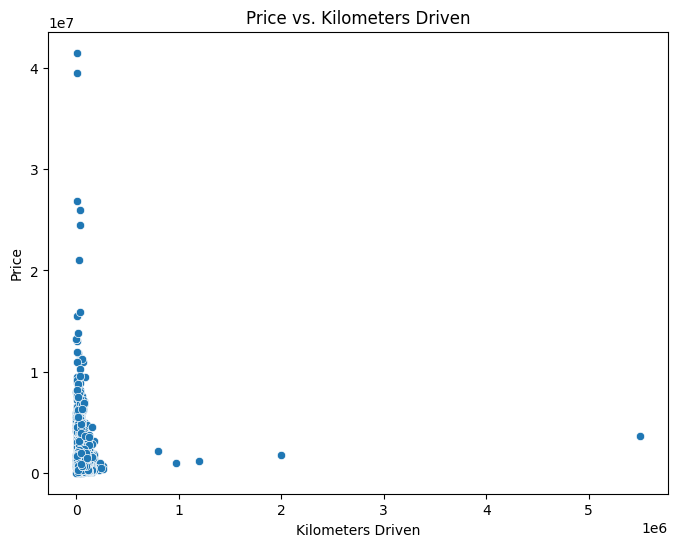

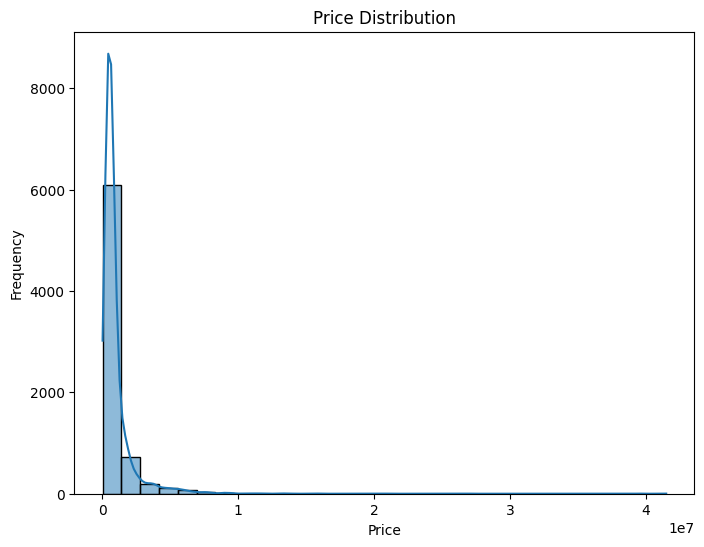

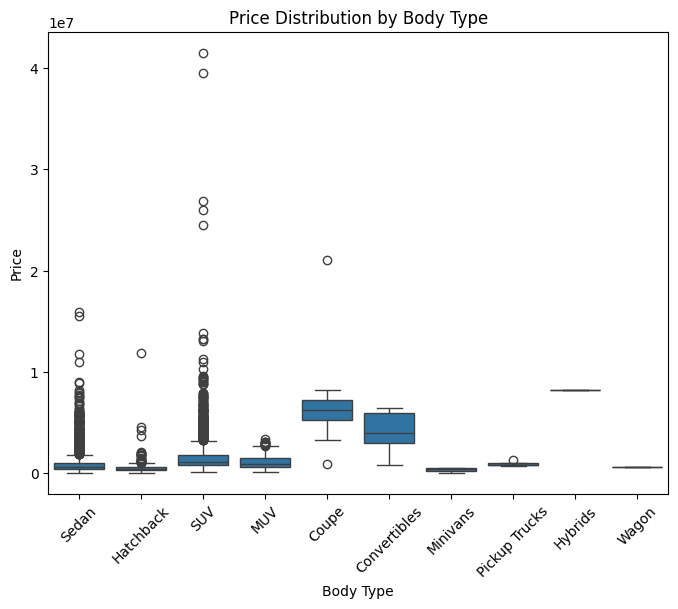

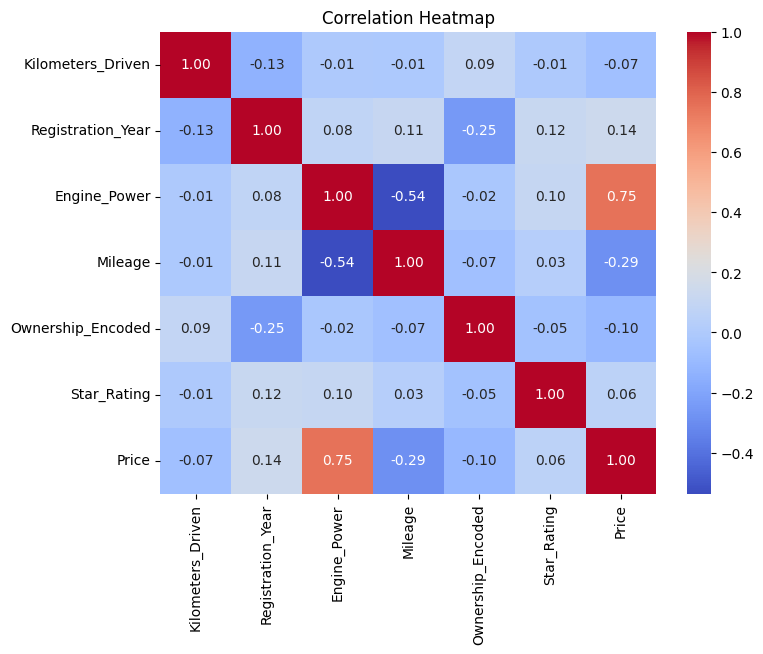

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_visualizations(df):
    # Scatter plot for Price vs. Kilometers Driven
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
    plt.title('Price vs. Kilometers Driven')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Price')
    plt.show()

    # Histogram for Price
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    # Box plot for Price by Body Type
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Body_Type', y='Price')
    plt.title('Price Distribution by Body Type')
    plt.xlabel('Body Type')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

    # Correlation heatmap
    # Convert non-numeric columns to numeric or drop them
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    corr = numeric_df.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

create_visualizations(combined_df)


In [7]:
df=pd.read_csv(r'C:\Users\moham\vs code\guvi\project-3\car_dheko\cleaned_combined_cars.csv')

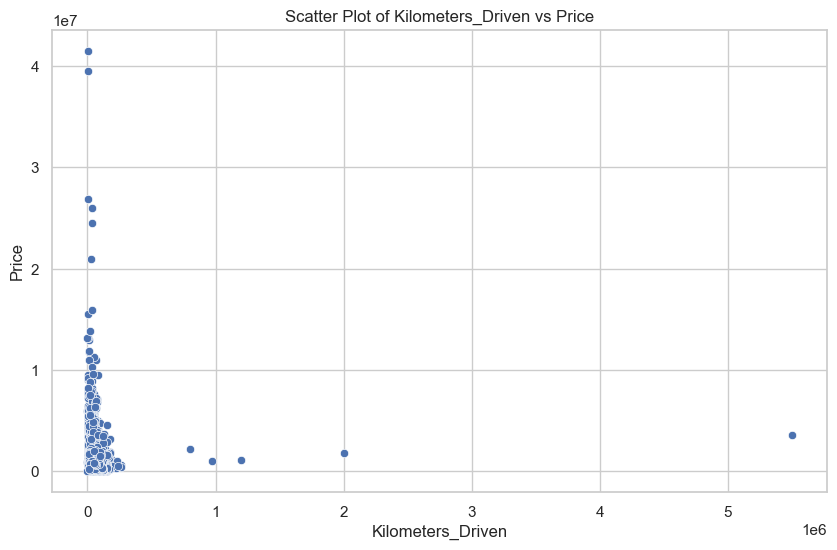

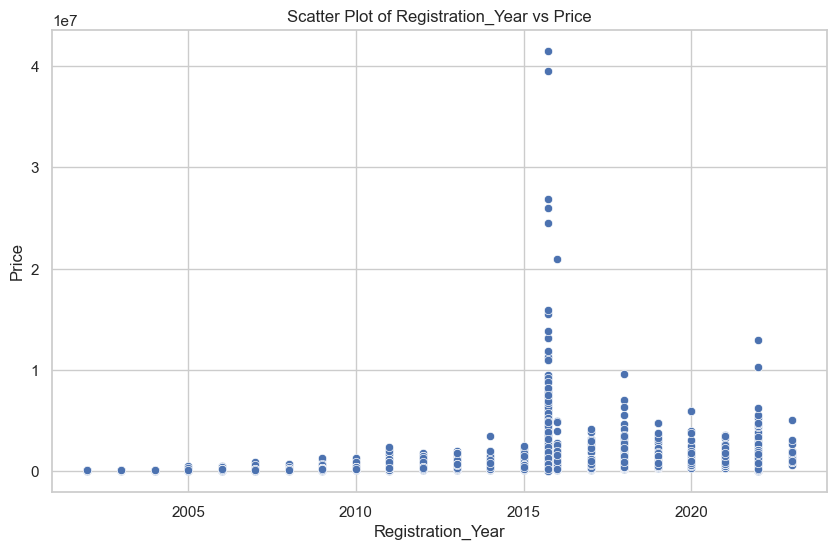

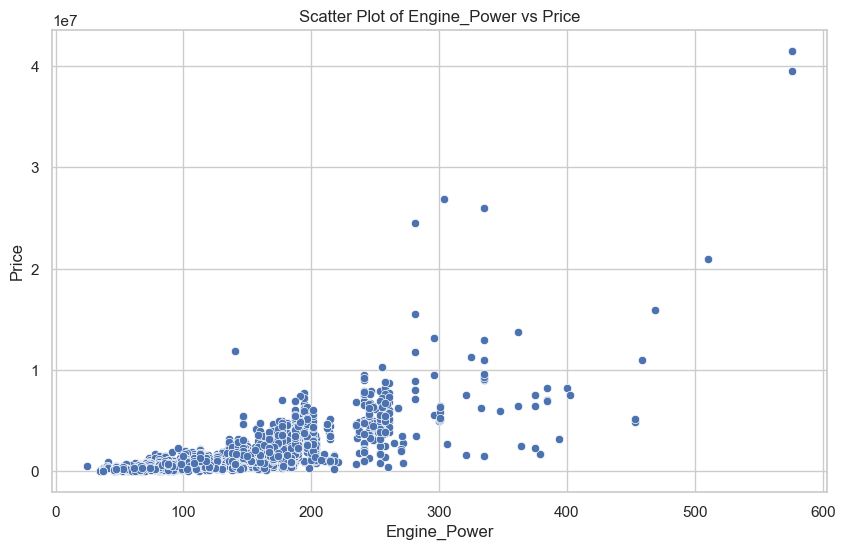

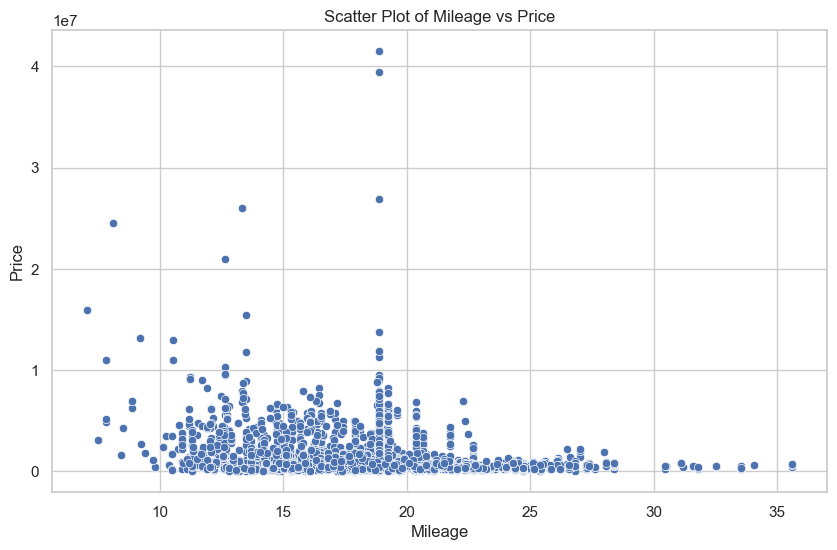

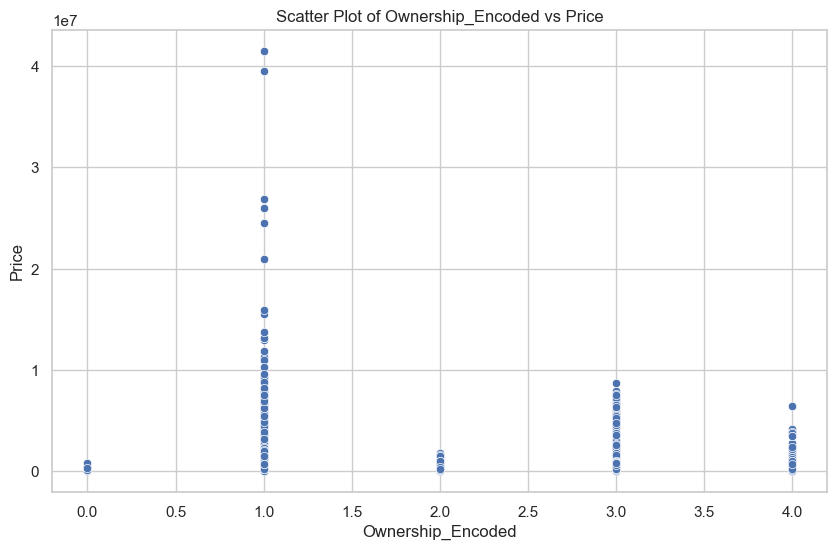

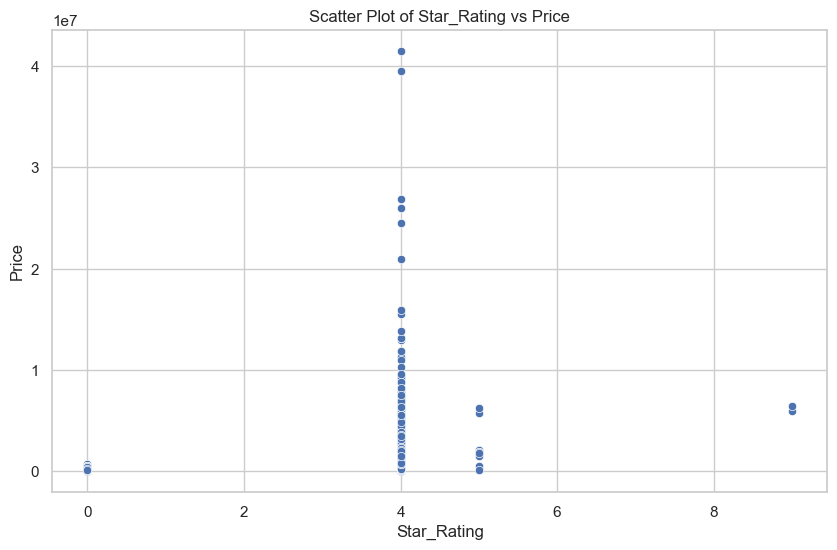

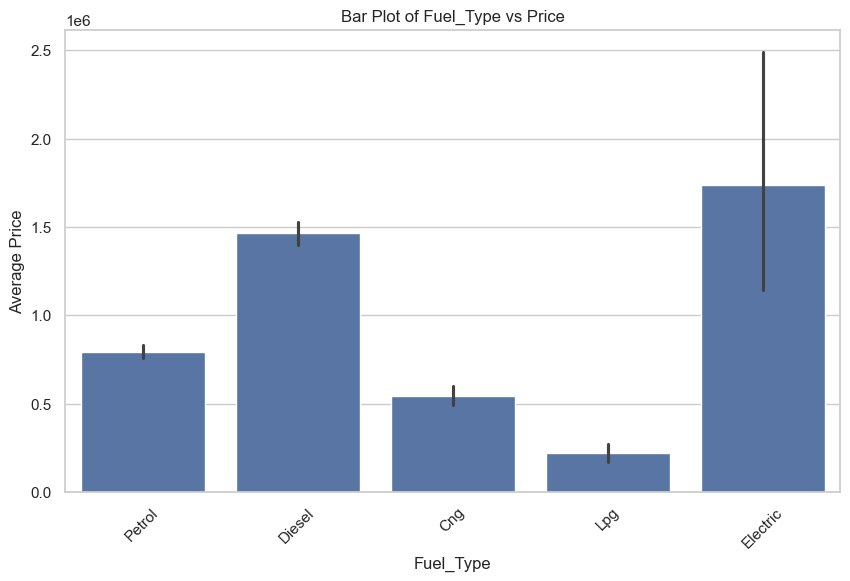

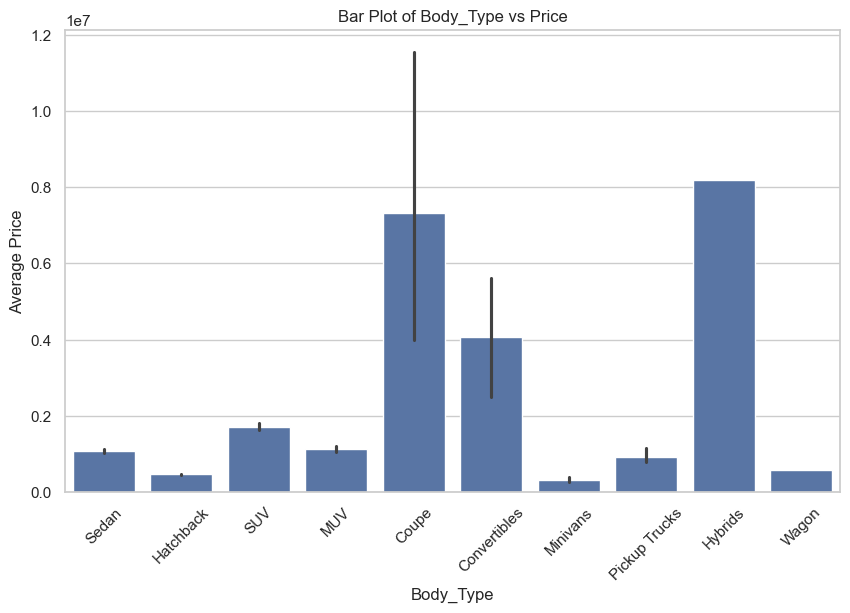

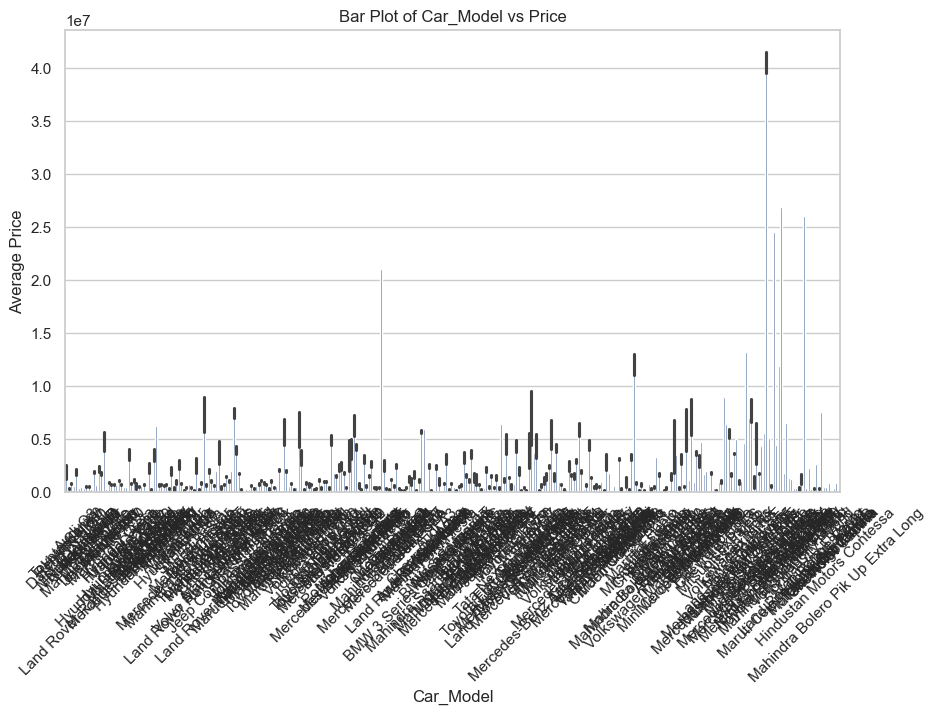

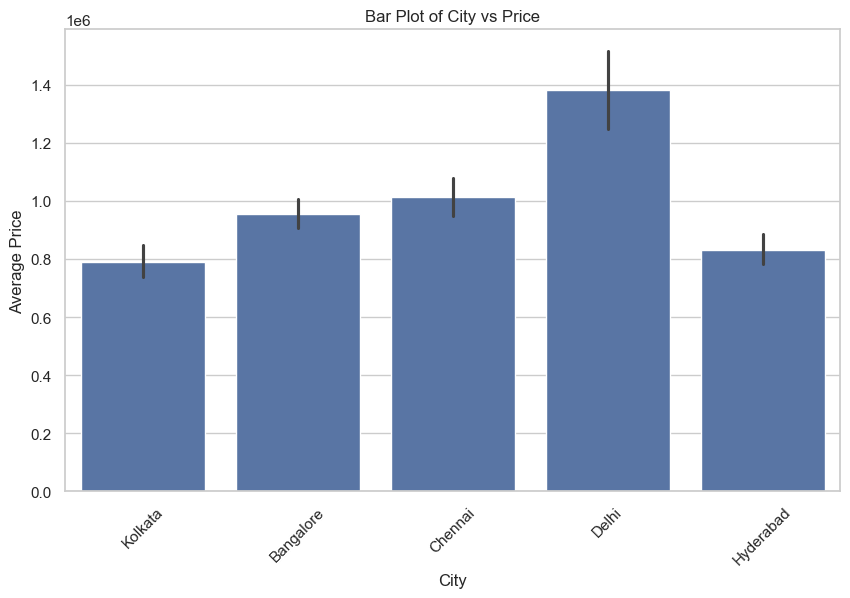

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_columns_vs_target(df, target_column):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Plotting numerical features
    for col in numerical_cols:
        if col != target_column:  # Avoid plotting the target against itself
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col, y=target_column)
            plt.title(f'Scatter Plot of {col} vs {target_column}')
            plt.xlabel(col)
            plt.ylabel(target_column)
            plt.show()

    # Plotting categorical features
    for col in categorical_cols:
            plt.figure(figsize=(10, 6))
            sns.barplot(data=df, x=col, y=target_column, estimator='mean')  # Use 'mean', 'median', or 'sum'
            plt.title(f'Bar Plot of {col} vs {target_column}')
            plt.xlabel(col)
            plt.ylabel(f'Average {target_column}')
            plt.xticks(rotation=45)  # Rotate x labels for better readability
            plt.show()
# Example usage
target_column = 'Price'  # Replace with your target variable
visualize_columns_vs_target(df, target_column)


C:\Users\moham\AppData\Local\Temp\ipykernel_14320\1128254897.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Mileage', y='Price', estimator='mean', ci='sd')


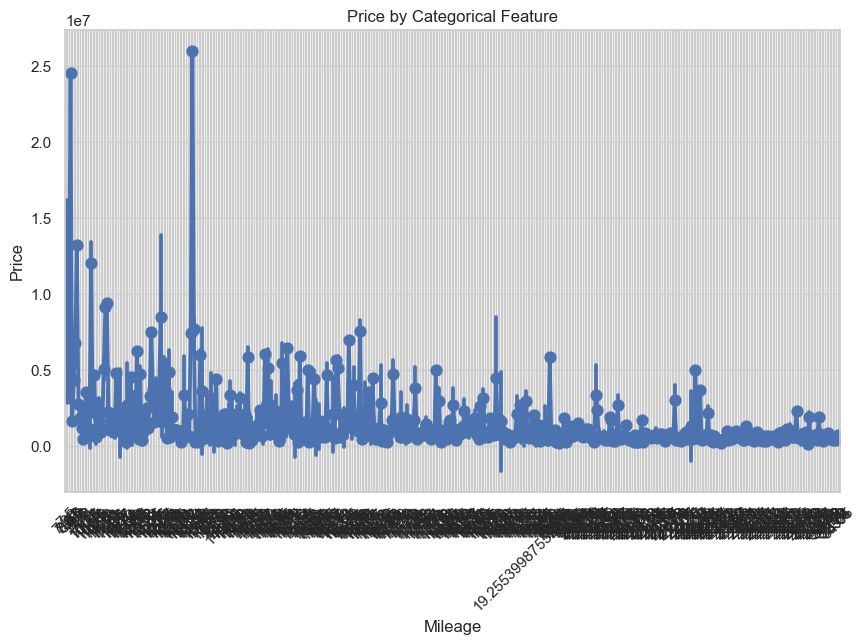

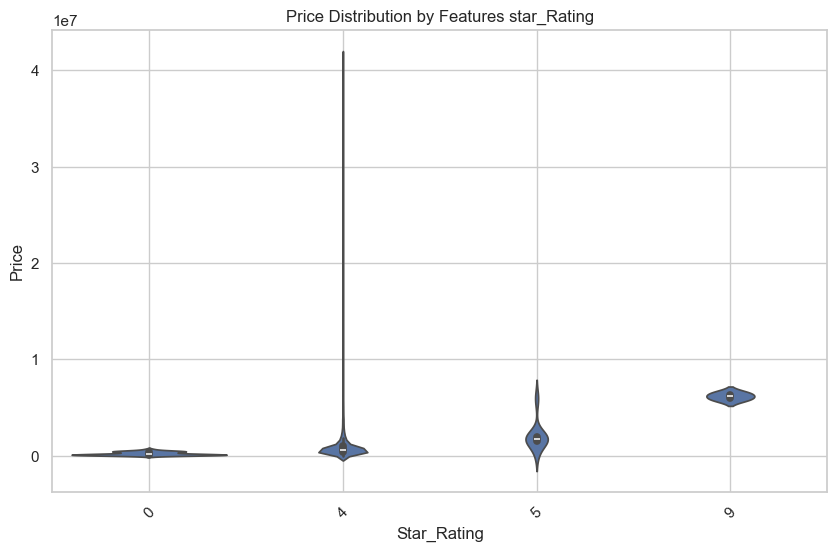

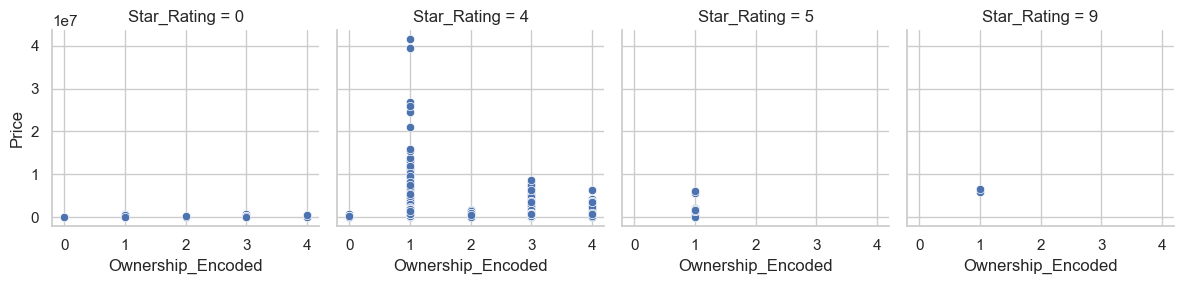

In [9]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='Mileage', y='Price', estimator='mean', ci='sd')
plt.title('Price by Categorical Feature')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Star_Rating', y='Price')
plt.title('Price Distribution by Features star_Rating')
plt.xlabel('Star_Rating')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

g = sns.FacetGrid(df, col='Star_Rating')
g.map(sns.scatterplot, 'Ownership_Encoded', 'Price')
plt.show()



Feature Selection

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_rows', 1000)
def feature_selection(df, target_column):
    # Convert categorical features to numeric using one-hot encoding
    df_encoded = pd.get_dummies(df)
    
    # Drop rows with missing values
    df_encoded = df_encoded.dropna()

    # Prepare data for feature importance
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = RandomForestRegressor(random_state=42)  # Use RandomForestRegressor for continuous target
    model.fit(X_train, y_train)

    # Get feature importance
    importances = model.feature_importances_

    # Display feature importance alongside feature names
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    return feature_importance_df

# Example usage
target_column = 'Price'  # Replace with your target variable
feature_importance_df = feature_selection(df, target_column)
print(feature_importance_df)


                                               feature    importance
2                                         Engine_Power  7.000078e-01
0                                    Kilometers_Driven  5.925044e-02
212                   Car_Model_Mercedes-Benz AMG G 63  4.430159e-02
133                   Car_Model_Land Rover Range Rover  2.974559e-02
221                          Car_Model_Mercedes-Benz G  2.135470e-02
3                                              Mileage  1.753086e-02
391  Features_Power Steering, Power Windows Front, ...  1.339737e-02
309                  Car_Model_Toyota Land Cruiser 300  1.266843e-02
5                                    Ownership_Encoded  1.076907e-02
4                                              Car_Age  7.301825e-03
1                                    Registration_Year  6.411828e-03
225                        Car_Model_Mercedes-Benz GLC  4.576602e-03
396  Features_Power Steering, Power Windows Front, ...  4.333725e-03
19                                

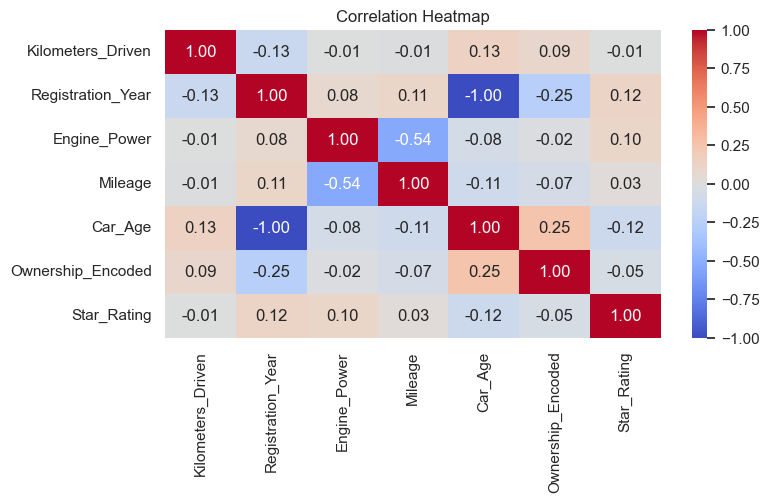

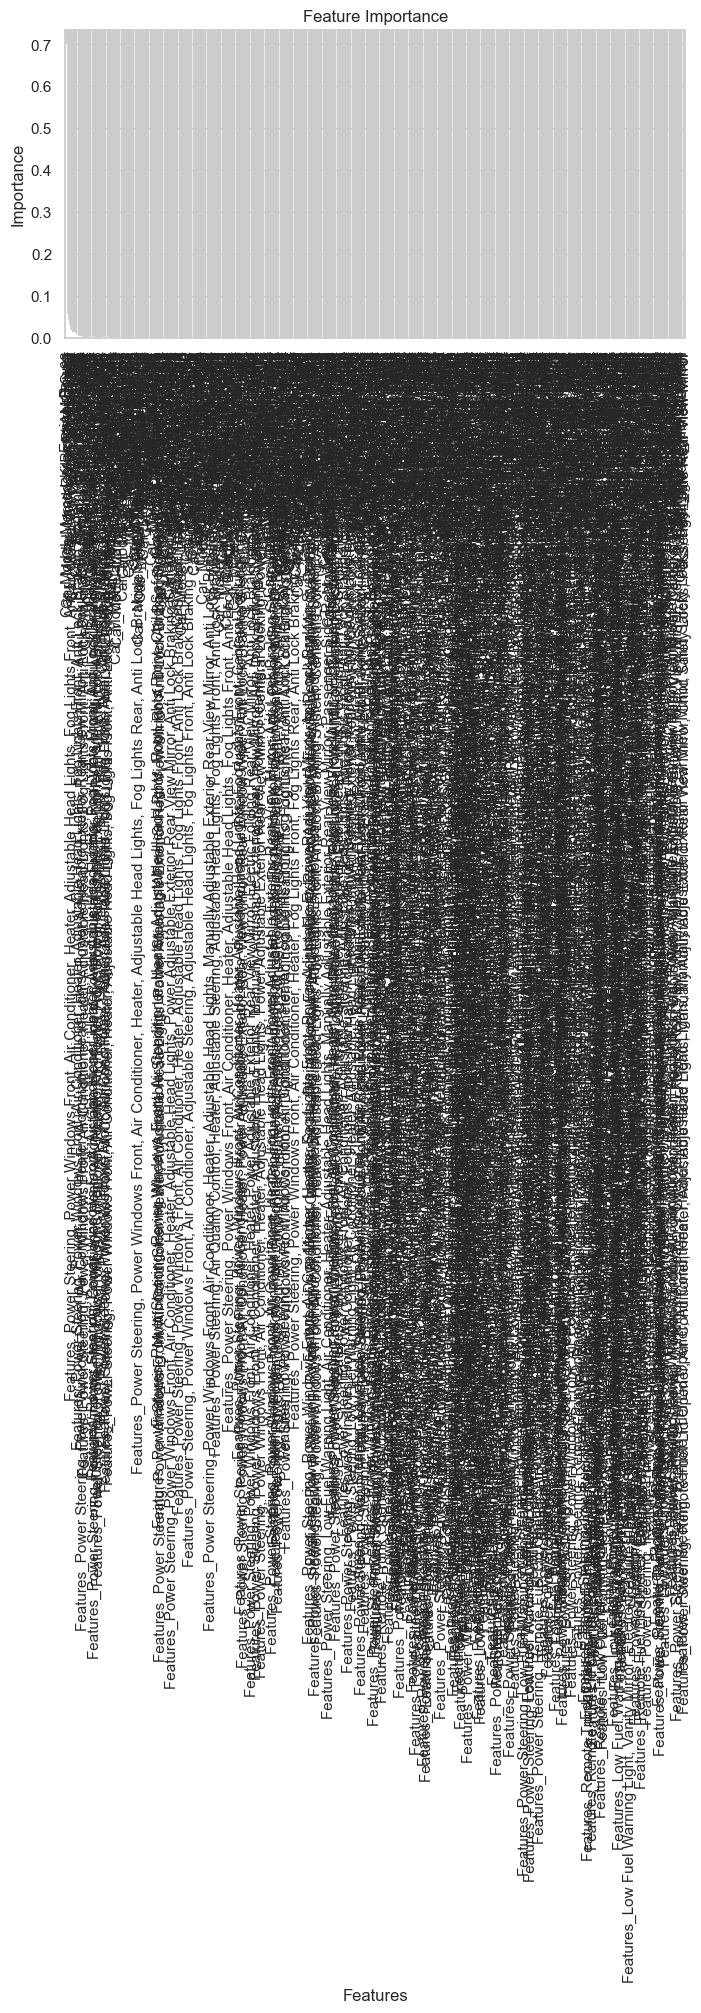

Feature Importances:
Engine_Power                                                                                                                                                                                                                                    7.000078e-01
Kilometers_Driven                                                                                                                                                                                                                               5.925044e-02
Car_Model_Mercedes-Benz AMG G 63                                                                                                                                                                                                                4.430159e-02
Car_Model_Land Rover Range Rover                                                                                                                                                                                            

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def feature_selection(df, target_column):
    # Convert categorical features to numeric using one-hot encoding
    df_encoded = pd.get_dummies(df)
    
    # Drop rows with missing values
    df_encoded = df_encoded.dropna()

    # Prepare data for feature importance
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    # Correlation analysis (for numeric columns only)
    numeric_df = X.select_dtypes(include=[float, int])
    plt.figure(figsize=(8, 4))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
   
    feature_importances.plot(kind='bar')
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

        
   
    return feature_importances

# Assuming 'Price' is the target column
feature_importances = feature_selection(df, 'Price')
print("Feature Importances:")
print(feature_importances)


3.Model_Development

Explanation:
Data Preparation: Convert categorical variables to numeric and drop rows with missing values.
Train-Test Split: Split the data into training and testing sets (80-20 split).
Standardization: Scale numerical features using StandardScaler.
Model Training: Train various models and evaluate them using cross-validation.
Hyperparameter Tuning: Use Grid Search for Random Forest and Random Search for Gradient Boosting to find the best hyperparameters.

In [1]:
pip install xgboost catboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/73/6a/bcd74a3d20104af87f882db6ea3931c48fe37b13f5f08b8a6b1eeecab0cc/catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata
  Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl (101.7 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (4


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.stats import randint

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(combined_df)
df_encoded = df_encoded.dropna()  # Drop rows with missing values

# Prepare data
target_column = 'Price'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training for 5 Iterations
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)  # verbose=0 to suppress logs
}


In [10]:

# Initialize result tracking
results = {model_name: {'CV Mean Score': [], 'CV Std Score': [], 'Test MSE': []} for model_name in models}

# Perform training and testing for 5 times
for i in range(5):
    print(f"Iteration {i+1}/5")
    for model_name, model in models.items():
        # Cross-Validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
        results[model_name]['CV Mean Score'].append(np.mean(cv_scores))
        results[model_name]['CV Std Score'].append(np.std(cv_scores))
        
        # Train the model
        model.fit(X_train_scaled, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        results[model_name]['Test MSE'].append(mse)

# Compute average results across the 5 iterations
final_results = {}
for model_name, metrics in results.items():
    final_results[model_name] = {
        'CV Mean Score': -np.mean(metrics['CV Mean Score']),
        'CV Std Score': np.mean(metrics['CV Std Score']),
        'Test MSE': np.mean(metrics['Test MSE'])
    }

# Print final averaged results
for model_name, metrics in final_results.items():
    print(f"{model_name}:")
    print(f"  CV Mean Score: {metrics['CV Mean Score']:.2f}")
    print(f"  CV Std Score: {metrics['CV Std Score']:.2f}")
    print(f"  Test MSE: {metrics['Test MSE']:.2f}\n")


Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Linear Regression:
  CV Mean Score: 5414226578158622103021382123832299487232.00
  CV Std Score: 3226394666994051184428349421676067291136.00
  Test MSE: 93877913735931273882225913871118368768.00

Decision Tree:
  CV Mean Score: 494717648540.41
  CV Std Score: 172665389845.16
  Test MSE: 326319492704.22

Random Forest:
  CV Mean Score: 398454491628.33
  CV Std Score: 144649441043.32
  Test MSE: 263214666960.99

Gradient Boosting:
  CV Mean Score: 372827194351.88
  CV Std Score: 144005191296.86
  Test MSE: 327419450476.65

XGBoost:
  CV Mean Score: 337817787939.64
  CV Std Score: 130205768488.70
  Test MSE: 266294509600.02

CatBoost:
  CV Mean Score: 325389256311.80
  CV Std Score: 139345251339.86
  Test MSE: 220562979764.72



KeyboardInterrupt: 

# Hyperparameter Tuning

Random Forest & Gradient Boosting 

In [11]:


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Random Forest Hyperparameter Tuning
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {-grid_search_rf.best_score_:.2f}")

# Gradient Boosting Hyperparameter Tuning
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid_gb, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_gb.fit(X_train_scaled, y_train)
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")
print(f"Best score for Gradient Boosting: {-random_search_gb.best_score_:.2f}")


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 388015744230.44
Best parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best score for Gradient Boosting: 332860870887.31


b. Hyperparameter Tuning for XGBoost

In [12]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {-grid_search_xgb.best_score_:.2f}")


Best parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
Best score for XGBoost: 325147990800.31


c.Hyperparameter Tuning for CatBoost

In [13]:
param_grid_cb = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8]
}

grid_search_cb = GridSearchCV(estimator=CatBoostRegressor(verbose=0), param_grid=param_grid_cb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_cb.fit(X_train_scaled, y_train)
print(f"Best parameters for CatBoost: {grid_search_cb.best_params_}")
print(f"Best score for CatBoost: {-grid_search_cb.best_score_:.2f}")


Best parameters for CatBoost: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
Best score for CatBoost: 328457115576.81


d. Hyperparameter Tuning for Decision Tree

In [14]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best score for Decision Tree: {-grid_search_dt.best_score_:.2f}")


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for Decision Tree: 470682232197.94


e.Hyperparameter Tuning for Linear Regression

In [15]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

grid_search_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train_scaled, y_train)
print(f"Best parameters for Ridge Regression: {grid_search_ridge.best_params_}")
print(f"Best score for Ridge Regression: {-grid_search_ridge.best_score_:.2f}")


Best parameters for Ridge Regression: {'alpha': 100}
Best score for Ridge Regression: 658646765705.17


4.Model_Evaluation

Explanation:
Data Preparation:

Load the dataset and prepare features and target variable.
Use ColumnTransformer with OneHotEncoder to handle categorical features.
Train-Test Split:

Split the dataset into training and testing sets.
Standardization:

Standardize the features using StandardScaler.
Model Training and Evaluation:

Train different models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting,CatBoost,XGBoost,Ridge Regression).
Predict the target values on the test set.
Compute evaluation metrics (MAE, MSE, R-squared).
Results Output:

Print the evaluation metrics for each model to compare their performance.

In [26]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Preprocessing
target_column = 'Price'
X = combined_df.drop(columns=[target_column])
y = combined_df[target_column]

# Convert categorical features to numeric using one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Handle missing values
imputer = SimpleImputer(strategy='mean')

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing on training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_train_encoded_imputed = imputer.fit_transform(X_train_encoded)

# Apply preprocessing on testing data
X_test_encoded = preprocessor.transform(X_test)
X_test_encoded_imputed = imputer.transform(X_test_encoded)

# Define models
models = {
    'CatBoost': CatBoostRegressor(silent=True),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Ridge Regression': Ridge()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_encoded_imputed, y_train)  # Train the model
    y_pred = model.predict(X_test_encoded_imputed)  # Make predictions

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Test MSE: {metrics['MSE']:.2f}")
    print(f"  Test MAE: {metrics['MAE']:.2f}")
    print(f"  R² Score: {metrics['R²']:.2f}\n")


CatBoost:
  Test MSE: 221014142376.61
  Test MAE: 184409.85
  R² Score: 0.85

XGBoost:
  Test MSE: 248640397125.70
  Test MAE: 178325.66
  R² Score: 0.83

Random Forest:
  Test MSE: 262989441640.37
  Test MAE: 169266.20
  R² Score: 0.82

Gradient Boosting:
  Test MSE: 329219235695.23
  Test MAE: 240202.57
  R² Score: 0.78

Decision Tree:
  Test MSE: 344554561341.00
  Test MAE: 216658.16
  R² Score: 0.77

Ridge Regression:
  Test MSE: 621646041270.78
  Test MAE: 466179.81
  R² Score: 0.58



In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for CatBoost
param_grid_catboost = {
    'depth': [4, 6, 8],
    'iterations': [200, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

catboost_model = CatBoostRegressor(silent=True)

# Use GridSearchCV for hyperparameter tuning
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, cv=5, scoring='r2', n_jobs=-1)
grid_search_catboost.fit(X_train_encoded_imputed, y_train)

print(f"Best parameters for CatBoost: {grid_search_catboost.best_params_}")
print(f"Best score for CatBoost: {grid_search_catboost.best_score_:.2f}")


Best parameters for CatBoost: {'depth': 4, 'iterations': 500, 'learning_rate': 0.2}
Best score for CatBoost: 0.86


In [37]:
def feature_engineering(df):
    df['Car_Age'] = 2024 - df['Year_Of_Registration']  # Use the correct column name here
    df['Engine_Size_Power_Ratio'] = df['Engine Power'] / df['Kilometers_Driven']
    return df

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Load the dataset
combined_df = pd.read_csv('cleaned_combined_cars.csv')

# Print column names to identify the correct name for 'Registration Year'
print("Column names in the dataset:", combined_df.columns)

# Feature Engineering
def feature_engineering(df):
    df['Car_Age'] = 2024 - df['Registration_Year']  # Adjust column name if necessary
    df['Engine_Size_Power_Ratio'] = df['Engine_Power'] / df['Kilometers_Driven']
    
    # Handle any potential division by zero or NaN values
    df['Engine_Size_Power_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['Engine_Size_Power_Ratio'].fillna(0, inplace=True)
    
    return df

combined_df = feature_engineering(combined_df)

# Prepare data
target_column = 'Price'
X = combined_df.drop(columns=[target_column])
y = combined_df[target_column]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=[np.number]).columns

# Define the preprocessing steps, including imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline to preprocess and then fit the models
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Lasso Regression (L1)': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1))
    ]),
    'Ridge Regression (L2)': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=0.1))
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]),
    'CatBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(silent=True))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor())
    ])
}

# Train models and evaluate performance
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R-squared': r2
    }

# Print evaluation metrics
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"  R-squared: {metrics['R-squared']:.2f}\n")


Column names in the dataset: Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'Registration_Year',
       'Car_Model', 'Engine_Power', 'Mileage', 'City', 'Ownership_Encoded',
       'Star_Rating', 'Price'],
      dtype='object')


C:\Users\moham\AppData\Local\Temp\ipykernel_10936\3279710674.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine_Size_Power_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_10936\3279710674.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Linear Regression:
  Mean Absolute Error (MAE): 258506.60
  Mean Squared Error (MSE): 418914481977.15
  R-squared: 0.72

Lasso Regression (L1):
  Mean Absolute Error (MAE): 258577.49
  Mean Squared Error (MSE): 439279400046.58
  R-squared: 0.71

Ridge Regression (L2):
  Mean Absolute Error (MAE): 263653.78
  Mean Squared Error (MSE): 396002956738.25
  R-squared: 0.73

Decision Tree:
  Mean Absolute Error (MAE): 230710.00
  Mean Squared Error (MSE): 389248125689.66
  R-squared: 0.74

Random Forest:
  Mean Absolute Error (MAE): 178530.99
  Mean Squared Error (MSE): 272485156024.05
  R-squared: 0.82

Gradient Boosting:
  Mean Absolute Error (MAE): 238675.11
  Mean Squared Error (MSE): 312128562117.51
  R-squared: 0.79

CatBoost:
  Mean Absolute Error (MAE): 188152.24
  Mean Squared Error (MSE): 231899525924.46
  R-squared: 0.84

XGBoost:
  Mean Absolute Error (MAE): 196364.61
  Mean Squared Error (MSE): 271409418410.95
  R-squared: 0.82

